In [117]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [139]:
class Perceptron():
    def __init__(self, lr=0.01, n_iter=50, random_state=1):
        self.lr = lr  # Learning rate (between 0.0 and 1.0)
        self.n_iter = n_iter  # Number of passes over training data
        # Random number generator seed for random weight initialization
        self.random_state = random_state

    def fit(self, X, y):
        rgenerator = np.random.RandomState(self.random_state)

        '''
            self.w is a 1d numpy array of size (m + 1) where m = the number of features (dimensions)
            +1 because we also want to add the bias unit
        '''
        self.w = rgenerator.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.errors = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X, y):
                delta_wi = self.lr * (yi - self.predict(xi))
                self.w[1:] += delta_wi * xi
                self.w[0] += delta_wi
                errors += int(delta_wi != 0.0)
            self.errors.append(errors)

    def compute_z(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        return np.where(self.compute_z(X) >= 0.0, 1, -1)

In [119]:
df = pd.read_csv('datasets/iris.csv', header=None, encoding="utf-8")
df.head(5)

,0,1,2,3,4
0,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [125]:
# We are going take 2 features into consideration sepal_length and petal_length
X = df.iloc[1:100, [0, 2]].values
y = df.iloc[1:100, -1].values
y = np.where(y == 'Iris-setosa', 1, -1)

In [126]:
X = X.astype(float)

In [127]:
X.shape

(99, 2)

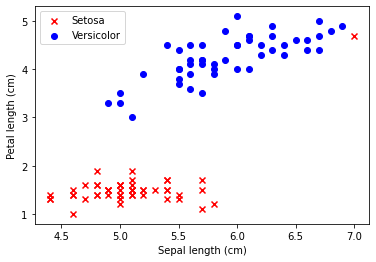

In [128]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='x', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='o', label='Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc='upper left')
plt.show()

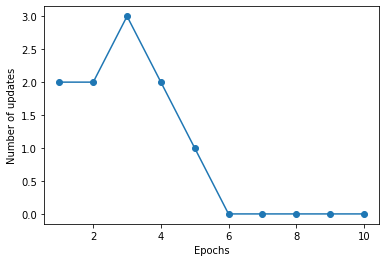

In [140]:
perceptron = Perceptron(lr=0.1, n_iter=10)
perceptron.fit(X, y)
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

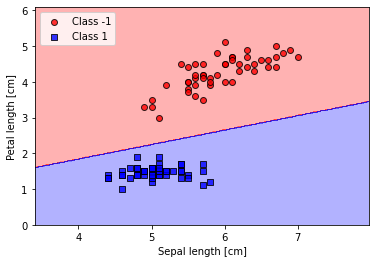

In [132]:
# Function for plotting decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


plot_decision_regions(X, y, classifier=perceptron)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()
